# CH10. Introduction to Artificial Neural Networks with Keras

## Implementing MLPs with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


### Creating the validation set / scaling the input features

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Creating the model using the Sequential API

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

In [15]:
weights, biases = model.layers[1].get_weights()
print(weights.shape)
print(weights[:5])
print(biases.shape)
print(biases[:5])

(784, 300)
[[ 0.04938962 -0.02860403 -0.03998362 ... -0.06061119  0.04956044
  -0.02126719]
 [-0.04828059  0.04784181 -0.02490778 ... -0.04113765  0.01276265
   0.0544267 ]
 [ 0.06984301  0.03849833 -0.03859895 ...  0.05643247 -0.05050392
   0.06370158]
 [-0.0061925   0.05148141  0.04990944 ... -0.06765397 -0.01060915
  -0.07342298]
 [ 0.05315703 -0.05924612  0.05325453 ...  0.02428999  0.06832942
  -0.03874038]]
(300,)
[0. 0. 0. 0. 0.]


### Compiling the model

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [17]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 123us/sample - loss: 0.7303 - accuracy: 0.7600 - val_loss: 0.4995 - val_accuracy: 0.8374
Epoch 2/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.4918 - accuracy: 0.8284 - val_loss: 0.4434 - val_accuracy: 0.8512
Epoch 3/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4453 - accuracy: 0.8443 - val_loss: 0.4184 - val_accuracy: 0.8582
Epoch 4/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4178 - accuracy: 0.8522 - val_loss: 0.3941 - val_accuracy: 0.8646
Epoch 5/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3975 - accuracy: 0.8591 - val_loss: 0.3828 - val_accuracy: 0.8700
Epoch 6/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3822 - accuracy: 0.8656 - val_loss: 0.3640 - val_accuracy: 0.8728
Epoch 7/30
55000/55000 [===========================

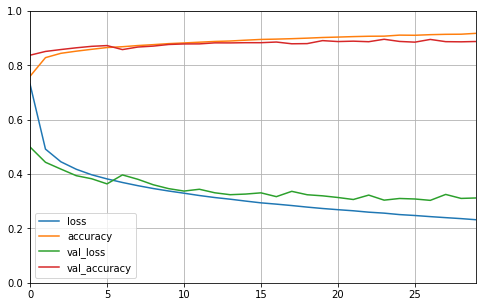

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch

### Evaluating on the test set

In [21]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[63.49992164344788, 0.8475]

### Using the model to make predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [27]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Regression MLP using the Sequential API

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 107us/sample - loss: 1.6260 - val_loss: 2.8957
Epoch 2/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5355 - val_loss: 0.4706
Epoch 3/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4467 - val_loss: 0.4440
Epoch 4/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4288 - val_loss: 0.4418
Epoch 5/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4246 - val_loss: 0.4317
Epoch 6/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4111 - val_loss: 0.4183
Epoch 7/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3998 - val_loss: 0.4205
Epoch 8/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3932 - val_loss: 0.4124
Epoch 9/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3962 - val_

In [30]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [31]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[2.3103347],
       [1.5689108],
       [2.7413125]], dtype=float32)

In [32]:
y_new = y_test[:3]
y_new

array([1.668, 1.596, 5.   ])